# Grocer Cleveland

In [615]:
import matplotlib.pyplot as plt
import numpy as np
import random

import grocercleveland.grocery_fns as grocery
import grocercleveland.grocery_class as gclass

### Check-out flow

1. Customer approaches the register area
2. Customer queues at the register with the shortest line length
3. **Later feature**: While the customer is at the top of the stack, they can switch to another register with shorter line or fewer items, since now they have had a bit of time to survey the other registers' lines and the contents of their customers' carts
4. Each register processes customers at a rate of n seconds per item, which is a fixed cashier trait
   a. The processing rate can be increased by a constant multiplier if a bagger is added to register
   b. When register is empty (0 items), cashier can "add" a customer from a neighboring queue (FIFO)  
5. The store can open another register if it has the capacity 

In [666]:
# Initialize store
cub = gclass.Store(15, 40)

n_cycles = 4
for _ in np.arange(n_cycles):
    cub.cycle(random.randint(20, 30))

## Customer Decisionmaking

In [383]:
miriam = gclass.Customer(cub)
attr_matrix = miriam.register_attributes()
weighted_attrs = miriam.ability_weight(attr_matrix)
scores = miriam.register_scores(weighted_attrs)

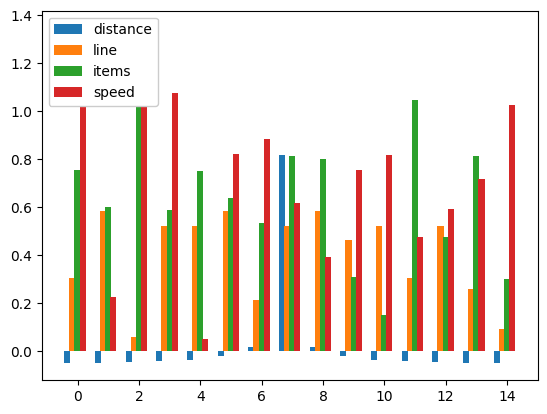

In [673]:
data = weighted_attrs
x = np.arange(data.shape[0])
dx = (np.arange(data.shape[1])-data.shape[1]/2.)/(data.shape[1]+2.)
d = 1./(data.shape[1]+1.)
lab = ["distance", "line", "items", "speed"]
fig, ax=plt.subplots()
for i in np.arange(data.shape[1]):
    ax.bar(x+dx[i], data[:,i], width=d, label=f"{lab[i]}")

plt.legend(framealpha=1, loc=2, fancybox=True)
plt.show()

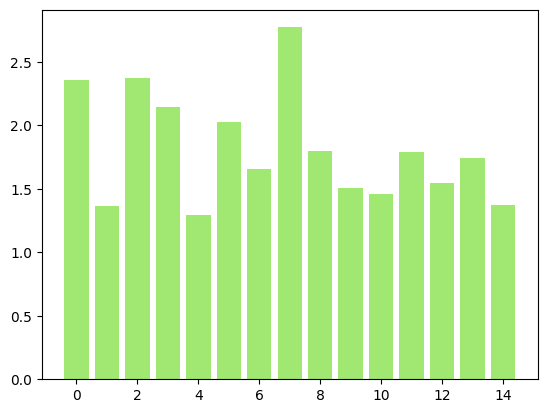

In [450]:
fig, ax = plt.subplots()
for i in np.arange(scores.shape[0]):
    ax.bar(i, scores[i], color= "#a0e872")
plt.show()